# Pymaceuticals Inc.
---

### Analysis

- Analysis based on the datasets provided:

1. No. of female mice vs. male mice in the sample data are almost equally distributed.

2. Out of the four drugs (Capomulin, Ramicane, Infubinol, Ceftamin) considered for the statistical analysis, Capomulin and Ramicane are more effective than the other two based on the median tumor volume. For one of the mice (ID #I509) treated with Capomulin that was considered for the line plot, we can see that the tumor volume reduces overall towards the end of 45 days (course of the experiment). We can observe the trend of effectiveness of any of the drugs like we saw for one of the mice (ID #I509).

3. Based on the scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen, tumor volume is positively corelated with the mouse weight, where for mouse with more weight, the tumor volume is higher. And, the correlation coefficient between mouse weight and the average tumor volume is 0.84.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how='right')

# Display the data table for preview
combined_df = combined_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites','Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = len(combined_df["Mouse ID"].value_counts())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mice_df = combined_df.loc[(combined_df['Mouse ID'] != 'g989')] 
clean_mice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_number = len(clean_mice_df['Mouse ID'].value_counts())
mice_number

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_group_df = clean_mice_df.groupby("Drug Regimen")

reg_mean = regimen_group_df['Tumor Volume (mm3)'].mean()
reg_median = regimen_group_df['Tumor Volume (mm3)'].median()
reg_variance = regimen_group_df['Tumor Volume (mm3)'].var()
reg_std = regimen_group_df['Tumor Volume (mm3)'].std()
reg_sem = regimen_group_df['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume": reg_mean,
                           "Median Tumor Volume":reg_median, 
                           "Tumor Volume Variance":reg_variance, 
                           "Tumor Volume Std. Dev.": reg_std, 
                           "Tumor Volume Std. Err.": reg_sem})

summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_summary =  clean_mice_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregate_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

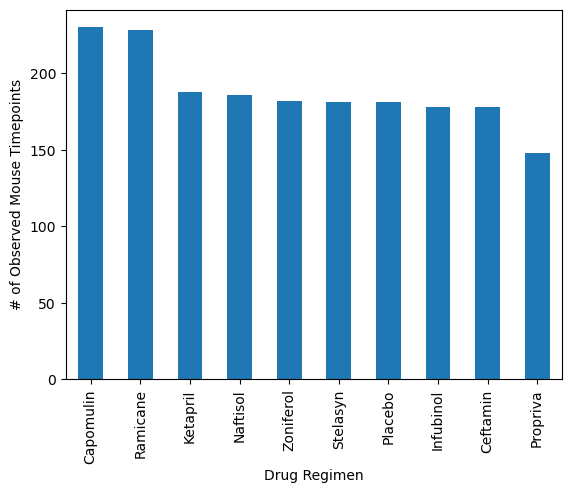

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

total_mice = clean_mice_df["Drug Regimen"].value_counts()
plot_pandas = total_mice.plot.bar(color='tab:blue')  
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

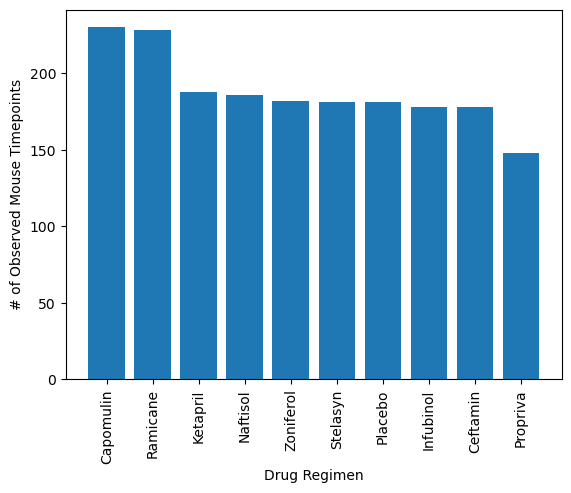

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = total_mice.index.values
y_axis = total_mice.values
plt.bar(x_axis, y_axis, color='tab:blue', align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

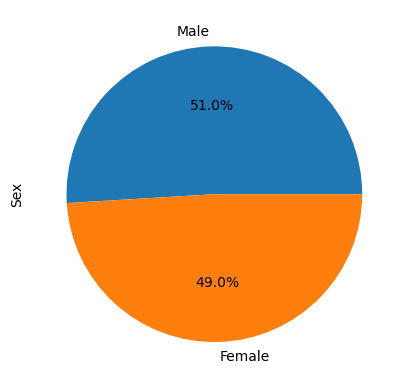

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

female_vs_male = clean_mice_df["Sex"].value_counts()
female_vs_male.plot.pie(autopct= "%1.1f%%")
plt.ylabel('Sex')
plt.show()

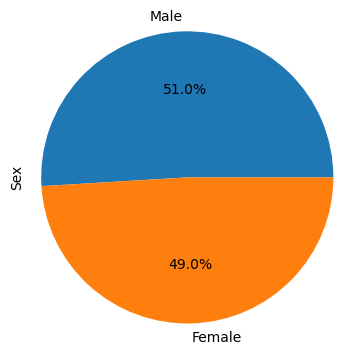

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

data = clean_mice_df['Sex'].value_counts()
plt.subplots(figsize = (3.65,3.65))
plt.pie(data, labels=data.index.values, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.axis("equal")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mice_timepoint = clean_mice_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint = mice_timepoint.merge(clean_mice_df,on=['Mouse ID','Timepoint'], how='left')
last_timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in treatment_regimen:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = last_timepoint.loc[last_timepoint["Drug Regimen"] == regimen, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    print(f"------------------------------------------------------------")
    print(f"The lower quartile of {regimen} is: {lowerq}")
    print(f"The upper quartile of {regimen} is: {upperq}")
    print(f"The interquartile range of {regimen} is: {iqr}")
    print(f"The the median of {regimen} is: {quartiles[0.5]} ")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be {regimen} outliers.")
    print(f"Values above {upper_bound} could be {regimen} outliers.")

    print(f"{regimen}'s potential outliers:{outliers}")


------------------------------------------------------------
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be Capomulin outliers.
Values above 51.83201549 could be Capomulin outliers.
Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be Ramicane outliers.
Values above 54.30681135 could be Ramicane outliers.
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------------------------------------------
The lower quartile of Infubin

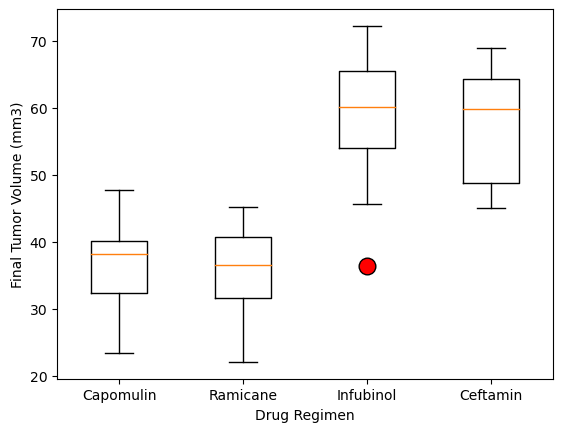

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

red_dot = dict(markerfacecolor = "red", markersize=12)
plt.boxplot(tumor_data, labels=treatment_regimen,flierprops= red_dot)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

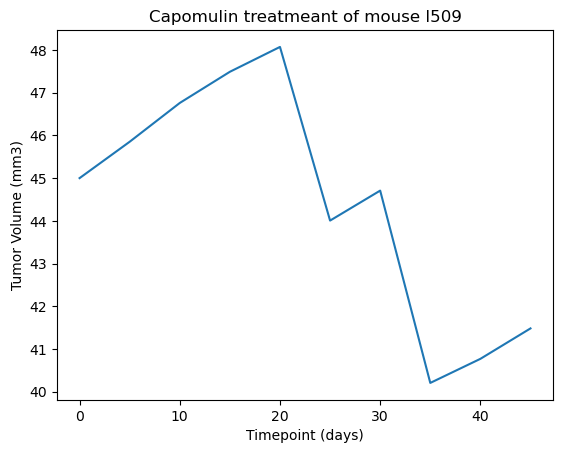

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

Capomulin_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Capomulin",:]
line_plot = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
line_plot.head()
x_axis = line_plot["Timepoint"]
y_axis = line_plot["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, y_axis, color="tab:blue")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


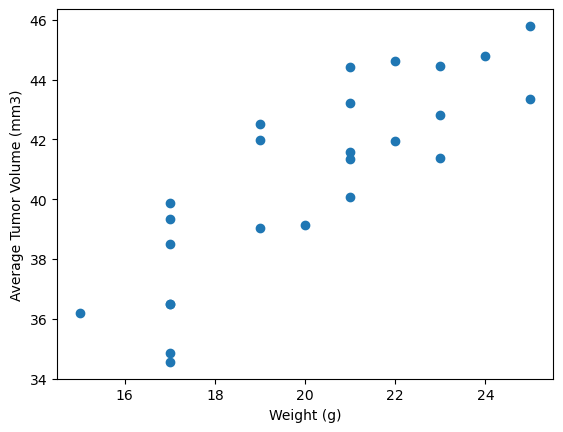

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

avg_vol = pd.DataFrame(Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

avg_vol = pd.merge(Capomulin_df, avg_vol, on='Mouse ID')
final_avg_vol = avg_vol[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()

x = final_avg_vol['Weight (g)']
y = final_avg_vol['avg_tumor_vol']
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


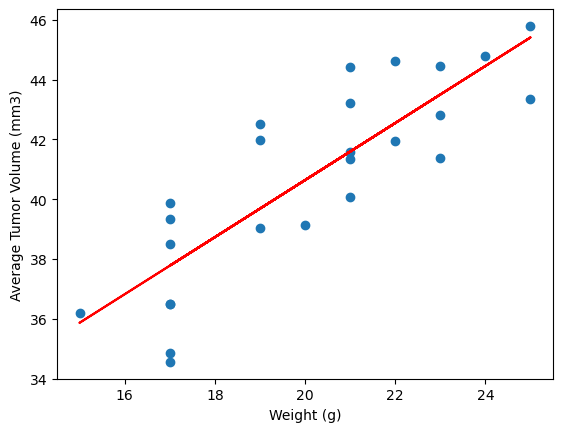

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(x,y)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

slope, intercept, rvalue, pvalue, std_err = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
